In [3]:
%matplotlib inline
import warnings
## scipy gives a waring when reading wav file
warnings.filterwarnings('ignore')

import scipy as sp
import scipy.io.wavfile
import scipy.signal
import numpy as np
from matplotlib import pyplot as plt
import importlib
from tools import tools

np.set_printoptions(suppress=True)

lenght of audio 127101024
data space size 1000 by 12799 totalling 12799000


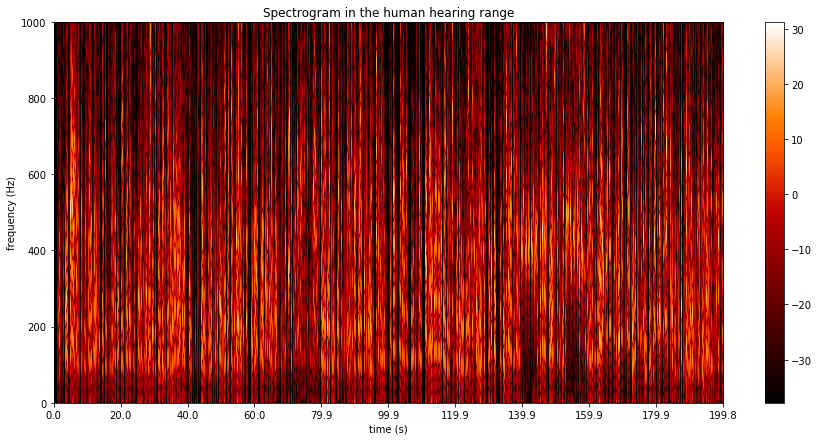

In [18]:
importlib.reload(tools)

# sample_rate, wav_data = scipy.io.wavfile.read("audio-files/kombucha.wav")
sample_rate, wav_data = sp.io.wavfile.read("audio-files/radiolab_crispr.wav")
# sample_rate, wav_data = sp.io.wavfile.read("audio-files/relief.wav")

# filtering out commercials
start_point = 200 * sample_rate
## taking just one channel
audio_data = wav_data[start_point:, 1]
    
segment_length = int(sample_rate/32)
overlap = int(segment_length / 2)
freq_bins, time_points, spectrogram = tools.generateSpectrogram(
    audio_data, segment_length, sample_rate, overlap, 2000, 200)
specdb = tools.todB(spectrogram + 1)
# reducing size for testing
specdb = specdb[0:1000]
# plotting
f = tools.plotSpectrogram(specdb, time_points)
# additional info
dbmax, dbmin = np.max(specdb), np.min(specdb)
dbrange = dbmax - dbmin
print("lenght of audio", len(audio_data))
print("data space size", specdb.shape[0], "by", specdb.shape[1], "totalling", specdb.shape[0] * specdb.shape[1], )

In [146]:
importlib.reload(tools)

limitd = 300
num_samples = 10000

samples_base = tools.sample_opt_constraint(specdb, num_samples, limitd)

-16.046707

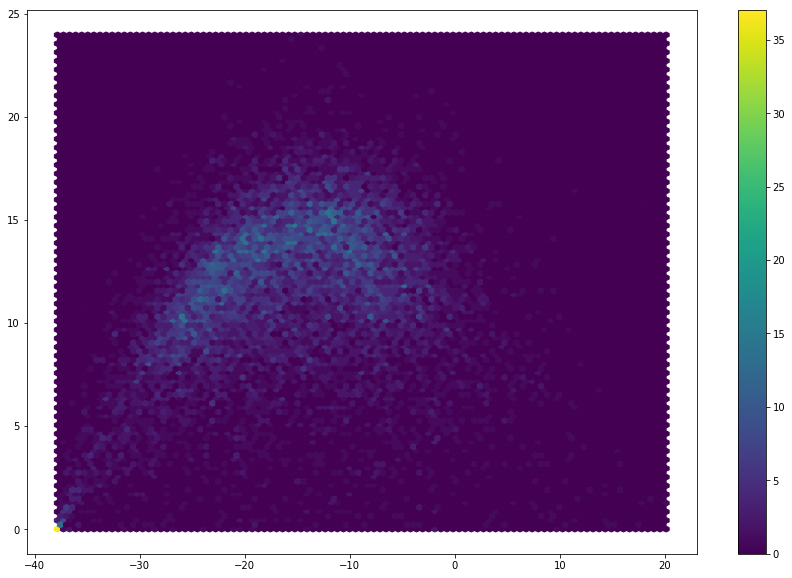

In [147]:
fig = plt.figure(figsize=(15,10))
plt.hexbin(samples_base[:,0], samples_base[:,1])
_d = plt.colorbar(orientation='vertical')
np.mean(specdb)

In [ ]:
importlib.reload(tools)

num_samples = 10000

a_const_deg = np.array([0, 5, 10, 45, 90])
a_const = a_const_deg / 180 * np.pi
d_const = np.array([5, 10, 15, 20, 25, 30])
bins = [65, 20]

base_hist, bx, by = np.histogram2d(samples_base[:,0], samples_base[:,1], normed=True, bins=bins)
base_hist = base_hist / np.sum(base_hist)
    
const_vs_base = np.empty((a_const.shape[0], len(d_const)))
for ai in range(len(a_const)):
    a = a_const[ai]
    for di in range(len(d_const)):
        d = d_const[di]
        s = tools.sample_opt_constraint(specdb, num_samples, distance_const=d, angle_constraint=a)
        h, xb, yb = np.histogram2d( s[:,0], s[:,1], normed=True, bins=bins)
        h = h / np.sum(h)

        diff = h - base_hist
        diff_pos = diff[diff > 0]
        const_vs_base[ai, di] = np.sum(diff_pos)

# print(const_vs_base)
        
xmesh, ymesh = np.meshgrid(d_const, np.arange(0, len(a_const)))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(313)
# plt.pcolor(xb, yb, my_interpolating_function)
plt.pcolor(xmesh,ymesh,const_vs_base)
plt.colorbar()

65 65 20 65


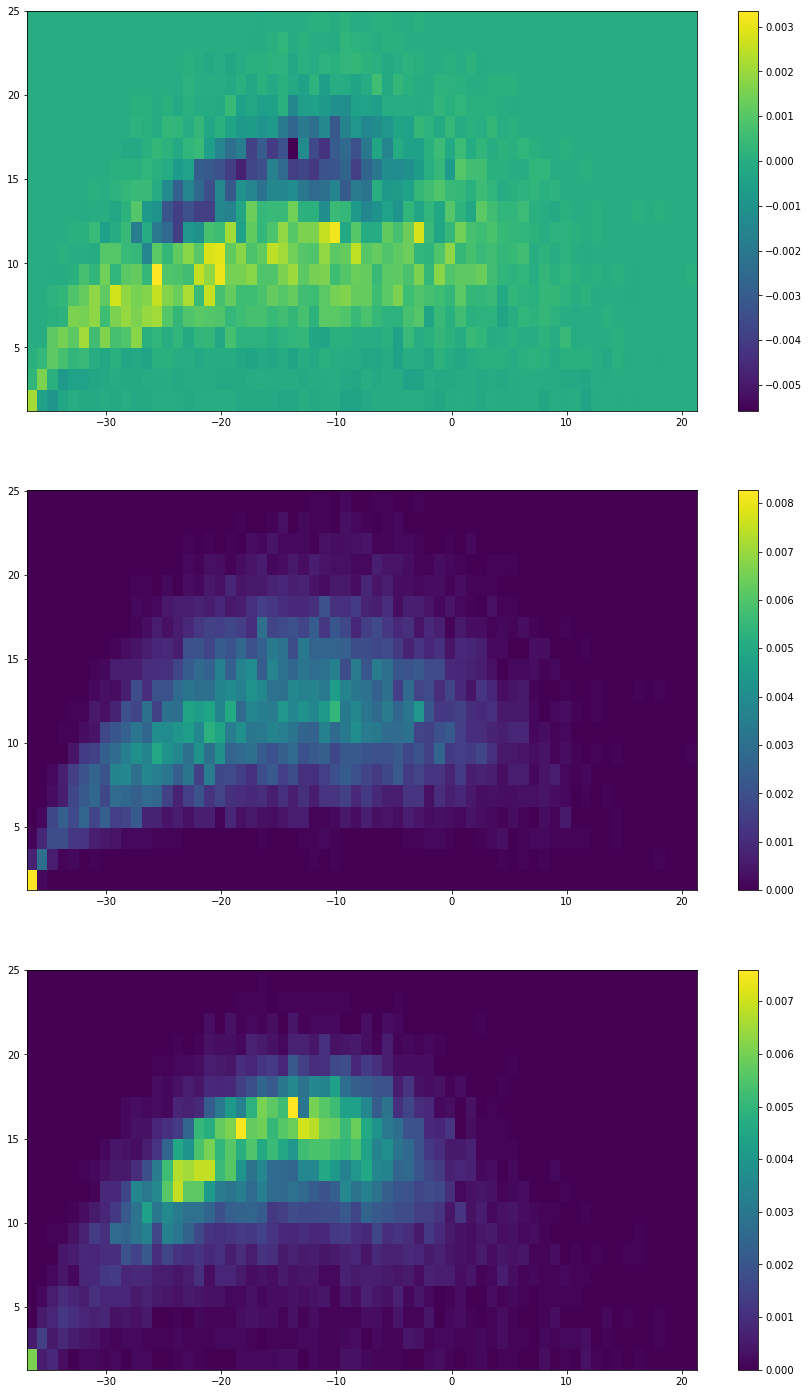

In [111]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RegularGridInterpolator

hall, xb, yb = np.histogram2d(sample_res[:,0], sample_res[:,1], normed=True, bins=[65, 20])
hc, xb, yb = np.histogram2d(sample_res_adc[:,0], sample_res_adc[:,1], normed=True, bins=[65, 20])
xb, yb = xb[1:], yb[1:]
xy, yx = np.meshgrid(yb, xb)

print(len(xy), len(xb), len(yb), len(h))


fig = plt.figure(figsize=(15,25))
ax = fig.add_subplot(311)
# plt.pcolor(xb, yb, my_interpolating_function)
plt.pcolor(xb,yb, hc.T - hall.T)
plt.colorbar()
ax = fig.add_subplot(312)
# plt.pcolor(xb, yb, my_interpolating_function)
plt.pcolor(xb,yb,hc.T)
plt.colorbar()
ax = fig.add_subplot(313)
# plt.pcolor(xb, yb, my_interpolating_function)
plt.pcolor(xb,yb,hall.T)
plt.colorbar()



In [71]:
x, y = np.mgrid[-1:1:20j, -1:1:20j]
x.shape

(20, 20)